Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 10

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 17, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Classification [8 Points]

In the lecture (ML-09 Slides 7ff) several types of classifiers have been introduced. In this assignment you will explore differences and similarities between them.

### a) LDA

How does the LDA classifier work? What restrictions have to be fullfilled by the data for this method to work and why?

The separatrix is given by $R(x) = w*x$ with the orthogonal vector $w = \Lambda ^{-1} *(\mu_+ - \mu_-)$. The difference between the means is multiplied with the inverse covariance to normalize it. By multiplying with the new data point one gets either a positive or negative value which is used to classify the point. Both classes have the same a priori probability and exhibit a Gaussian distribution. The covariances are assumed to be identical.

### b) Nearest Neighbor

How does the nearest neighbor classifier work? When would you use it and how is it trained?

The separatrix is only implicitly defined by its neighbours. A new example is classified by calculating the distance to its nearest neighbours and classifying it with the most common class. This local method has no parameters and does not generalize, hence it would be best used when memory and classification time is not important and a immediate training is desired. Training is only memorizing the classified examples. 

### c) Support Vector Machines

Name some differences between a SVM and a MLP. When would you use which?

MLPs can classify various classes whereas SVMs are two-classes classifier. SVMs can only classify non-linear problems if the kernel trick is used. SVMs are far more intuitive and have meaningful parameters whereas MLPs are much harder to interpret. SVMs can deal with outliers whereas those effect the whole performance of the MLP. 

### d) Random forests

Explain in your own words the concept of a *random forest*. What is meant by *bagging of trees* and *bagging of features* and what are the respective benefits? How do radom forests allow for *parallelization* in *training* and *classification*? 

A random forest uses decision trees to classify data. Various trees are used to allow for averaging out overfitting and reducing the variance of classification. Bagging of trees: A forest created by using randomized data samples to get different uncorrelated trees. Bagging of features: A forest is created by choosing the best node out of a random set of all features. This has the advantage of reducing the effect of features with extreme predictive value.

## Assignment 2: Reinforcement Learning [12 Points]

In this assignment you will have a look at the Q-Learning algorithm described in the lecture (ML-10 Slide 18). For this we generate a field with random rewards. A learning agent is then exploring the field and learns the optimal path to navigate through it. The code below is again filled with some ``TODO``s that should be filled by you in order to implement the Q-Learning algorithm. 

Below the code there are some questions! You also find a free-code field for a complete own implementation. You may use your own test mazes.

In [1]:
import numpy as np
import numpy.random as rand

def generate_field(x, y, num_rewards, max_reward):
    """
    Generate a random game field with rewards.
    
    Args:
        x (int):            x dimension of the field
        y (int):            y dimension of the field 
        num_rewards (int):  the number of rewards that should be randomly placed
        max_reward (int):   the maximum reward that can be placed 
        
    Returns:
        ndarray: A field with randomly initialized rewards, the rest of the 
        entries is zero
    """
    field = np.zeros((y,x), dtype=np.uint8)
    
    for i in range(num_rewards):
        field[rand.randint(y), rand.randint(x)] = rand.choice(max_reward)
    
    return field

In [8]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

class QLearning:
    """
    This class contains all the necessary methods to navigate through
    a maze or game with the help of a little bit of Q-Learning.
    """

    def __init__(self, field, actions, gamma):
        """
        Initializes the QLearning Algorithm with the necessary parameters.
        All q values are stored in self.q - this is an array that has
        ACTIONS x map_x x map_y dimensions to store a value for each action
        in each field. The starting position self.pos is randomly initialized.
        
        Args:
            field (ndarray):  the map
            actions (list):   the available actions
            gamma (float):    the gamma in the lecture slides
        
        Returns:
            QLearning: An instance that can be used for Q-Learning on the field
        """
        # q stores the q_values for each action in each space of the field.
        self.field = field
        self.actions = actions
        self.gamma = gamma
        
        # Remember the map extend for further navigation.
        self.map_y = self.field.shape[0]
        self.map_x = self.field.shape[1]
        
        # Create q value matrix.
        self.q = np.zeros((len(self.actions), self.map_y, self.map_x))

        # Start on a random position in the field.
        self.pos = [np.random.randint(self.map_y), np.random.randint(self.map_x)]


    def get_coordinates(self, position, action):
        """
        Returns the coordinates that follow a certain action, depending
        on the current position of the learner. If the border is reached
        the agent just stops there.
        
        Args:
            position (pair):  the current position
            action (string):  the action that should be performed (one of: 'up', 'down', ...)
            
        Returns:
            pair of int: the updated coordinates
        """
        # return the right new coordinates depending on the position
        y_new = position[0]
        x_new = position[1]
        
        if action == 'up':
            y_new -= 1 if y_new > 0 else 0
        elif action == 'down':
            y_new += 1 if y_new < self.map_y-1 else 0
        elif action == 'right':
            x_new += 1 if x_new < self.map_x-1 else 0
        elif action == 'left':
            x_new -= 1 if x_new > 0 else 0
        
        return (y_new,x_new)


    def update(self):
        """
        Implementation of the update step. Closely follows the Algorithm described on
        ML-10 Sl.18. Note that you have attributes available as specified in the
        __init__ method of this class, in addition to that is the FIELD variable that
        stores the real field the agent is iterating about, as well as ACTIONS which
        stores the available actions.
        """
        # Select a random action that should be performed next.
        # Be careful to handle the case where you hit the wall!
        new_pos = self.pos
        while new_pos == self.pos:
            action = np.random.choice(self.actions)
            action_index = self.actions.index(action)
            new_pos = self.get_coordinates(self.pos, action)
            

        # Receive the reward for the new position from the field.
        r = self.field[new_pos[0], new_pos[1]]
        
        # Update the q-value for the performed action.
        self.q[action_index, self.pos[0], self.pos[1]] = r + self.gamma * max(self.q[:,new_pos[0], new_pos[1]])

        # Update the position of the player to the new field.
        self.pos = new_pos


    def plot(self):
        """
        Plots the current state.
        """
        fig_player = plt.figure('QLearning State')

        for i, direc in enumerate(ACTIONS):
            plt.subplot(3,3,2*i+2)
            plt.axis('off')
            plt.title(direc)
            plt.imshow(self.q[i,:,:], interpolation = 'None')

        fig_player.canvas.draw()

<IPython.core.display.Javascript object>


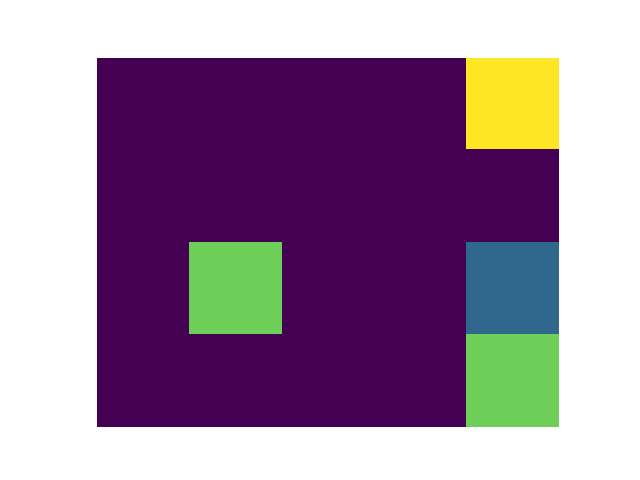

<IPython.core.display.Javascript object>


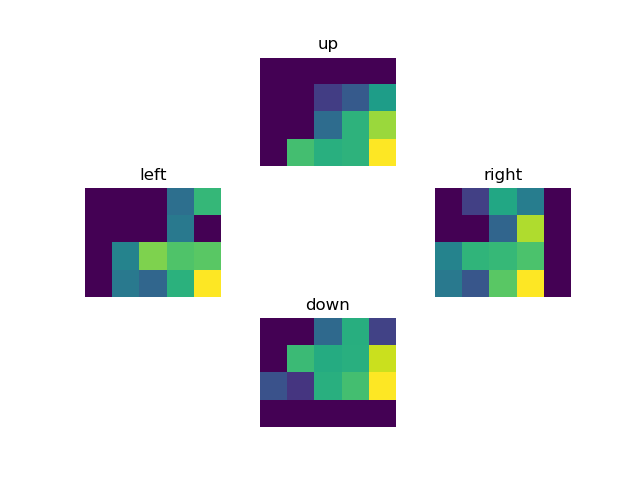

C:\Users\Ann-Kathrin Schalkam\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt

# Determine the size of the field, change this parameters as you like
m_x = 5
m_y = 4

steps = 200

ACTIONS = ['up','left','right','down']  # Those are the availabe actions for the QLearning.
FIELD = generate_field(m_x, m_y, 5, 10) # The field that is used for learning.

# Plotting the generated field
figure = plt.figure('Field')
plt.axis('off')
plt.imshow(FIELD, interpolation='none')
figure.canvas.draw()

# Generate a QLearning instance with the right parameters
player = QLearning(FIELD, ACTIONS, 0.9)

# Now we perform steps many learning iterations on the field with
# the generated QLearning instance.
for i in range(steps):     
    player.update()
    player.plot()

Explain in your own words, how the algorithm works. What is depicted on the resulting plots. How can an action policy be derived from these data?

The Q-Learning algorithm chooses an action from the set of possible actions and updates the expected reward according to the reward that was given and the maximum reward that can be expected at the new position. This is how the agent learns which paths are assumed to lead to the maximal reward.

The plots show where a certain action leads to a high reward. In the colored regions a certain action leads to a maximazation of expected reward.

You are also free to write your complete own implementation of the QLearning algorithm (instead of completing the code above). Use the following cell for your implementation.

In [ ]:
# YOUR CODE HERE